# Compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.


The raw image is available in spicy.misc package with the name face.
Hint:


In [55]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

In [64]:
image = misc.face(gray = True)

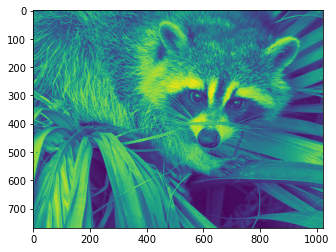

In [65]:
plt.imshow(image)

In [66]:
print(image.shape)
print(type(image))


(768, 1024)
<class 'numpy.ndarray'>


In [74]:
#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 1)



In [70]:
def compressImage(cluster_size):
    
    #Implement k-means clustering to form k clusters
    kmeans = KMeans(n_clusters= cluster_size)
    kmeans.fit(image)

    #Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    

    #Reshape the image to original dimension
    compressed_image = compressed_image.reshape(rows, cols, 1)

    #Save and display output image
    io.imsave("compressed_image"+str(cluster_size)+".png", compressed_image)
    io.imshow(compressed_image)
    io.show()

64


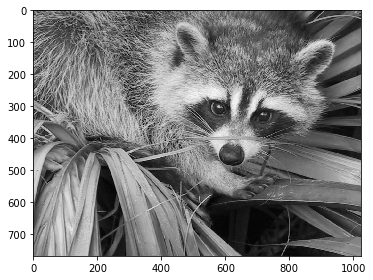

32


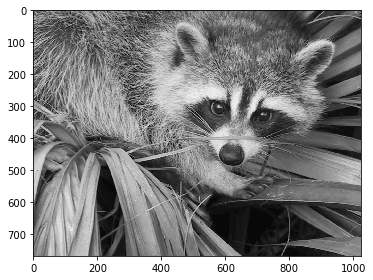

16


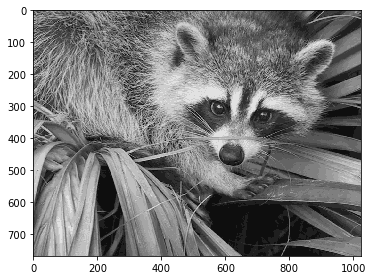

8


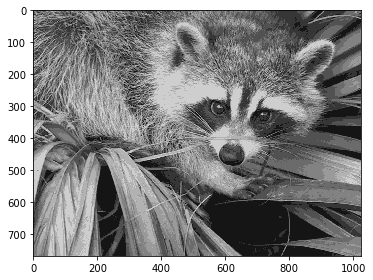

4


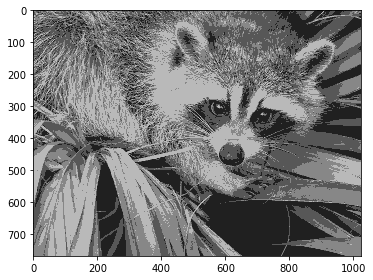

2


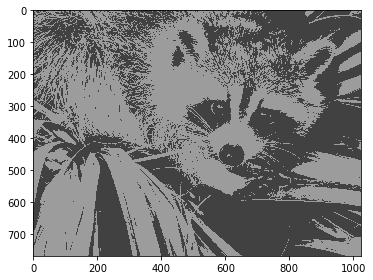

In [73]:
cluster_sizes = [64,32,16,8,4,2]
for size in cluster_sizes:
    print(size)
    compressImage(size)